In [1]:
import jax.numpy as jnp
import jax
from jax.config import config
config.update("jax_enable_x64", True)
from jax import jacfwd, jacrev

from jax import jit
import numpy as np
import jax_cosmo as jc
from likelihood import Likelihood
import matplotlib.pyplot as plt

import emcee


In [2]:
lhood = Likelihood()
#fidparam = np.array([0.8159,  0.2589,  0.0486,  0.6774,  0.9667, -1., 2., 1.])
#symbols = ['$\sigma_{8}$', '$\Omega_{c}$', '$\Omega_{b}$', '$h$', '$n_{s}$', '$w_{0}$', '$b_lbg$', '$b_int$']
fidparam = np.array([0.8159,  0.2589,  0.0486,  0.6774,  0.9667, -1.])
symbols = ['$\sigma_{8}$', '$\Omega_{c}$', '$\Omega_{b}$', '$h$', '$n_{s}$', '$w_{0}$']

Initialising likelihood
Initialisation Complete


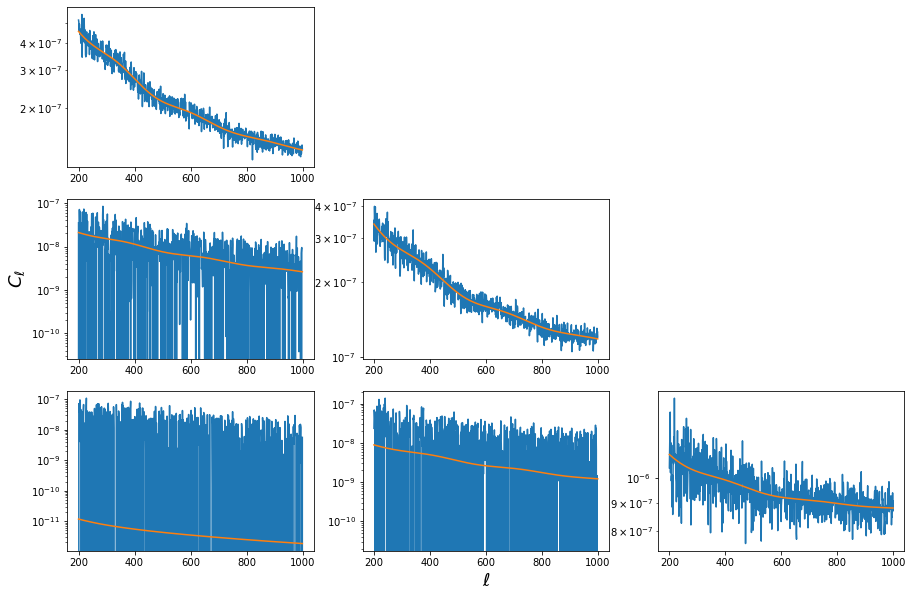

In [3]:
lhood.plot_data_cls()

In [4]:
def logp(p):
    sig8, o_c, o_b, h, n_s, w_0, b_lbg, b_int = p
    if(sig8 < 0.0 or sig8 > 1.1):
        return -np.inf
    elif(o_c < 0.001 or o_c > 0.99):
        return -np.inf
    elif(o_b < 0.001 or o_b > 0.2):
        return -np.inf
    elif(h < 0.1 or h > 1.1):
        return -np.inf
    elif(n_s < 0.1 or n_s > 1.1):
        return -np.inf
    elif(w_0 < -5.0 or w_0 > -0.3):
        return -np.inf
    elif(b_lbg < -1 or b_lbg > 30):
        return -np.inf
    elif(b_int < -1 or b_int > 30):
        return -np.inf
    else:
        return lhood.logLgauss(p)

In [5]:
def logp(p):
    sig8, o_c, o_b, h, n_s, w_0 = p
    b_lbg, b_int = lhood._b_lbg, lhood._b_int
    if(sig8 < 0.0 or sig8 > 1.1):
        return -np.inf
    elif(o_c < 0.001 or o_c > 0.99):
        return -np.inf
    elif(o_b < 0.001 or o_b > 0.2):
        return -np.inf
    elif(h < 0.1 or h > 1.0):
        return -np.inf
    elif(n_s < 0.1 or n_s > 1.1):
        return -np.inf
    elif(w_0 < -5.0 or w_0 > -0.3):
        return -np.inf
    else:
        params = sig8, o_c, o_b, h, n_s, w_0, b_lbg, b_int
        return lhood.logLgauss(params)

In [6]:
logp(fidparam)

DeviceArray(-2360.69758583, dtype=float64)

In [7]:
ndim, nwalkers = 6, 100

In [8]:
sig8 = np.random.uniform(0.91, 0.92, nwalkers)
o_c = np.random.uniform(0.31, 0.32, nwalkers)
o_b = np.random.uniform(0.06, 0.07, nwalkers)
h = np.random.uniform(0.5, 0.51, nwalkers)
n_s = np.random.uniform(0.91, 0.92, nwalkers)
w0 = np.random.uniform(-1.6, -1.5, nwalkers)
#b_lbg = np.random.uniform(5, 6, nwalkers)
#b_int = np.random.uniform(5, 6, nwalkers)

In [9]:
sig8 = np.random.uniform(fidparam[0], fidparam[0]+0.001, nwalkers)
o_c = np.random.uniform(fidparam[1], fidparam[1]+0.001, nwalkers)
o_b = np.random.uniform(fidparam[2], fidparam[2]+0.001, nwalkers)
h = np.random.uniform(fidparam[3], fidparam[3]+0.001, nwalkers)
n_s = np.random.uniform(fidparam[4], fidparam[4]+0.001, nwalkers)
w0 = np.random.uniform(fidparam[5], fidparam[5]+0.001, nwalkers)
#b_lbg = np.random.uniform(fidparam[6], fidparam[6]+0.001, nwalkers)
#b_int = np.random.uniform(fidparam[7], fidparam[7]+0.001, nwalkers)

In [10]:
#p0 = np.transpose(np.vstack([sig8, o_c, o_b, h, n_s, w0, b_lbg, b_int]))
p0 = np.transpose(np.vstack([sig8, o_c, o_b, h, n_s, w0]))

In [11]:
p0.shape

(100, 6)

In [12]:
filename = "mcmc_data.h5"
backend = emcee.backends.HDFBackend(filename)
backend.reset(nwalkers, ndim)

In [13]:
move = emcee.moves.StretchMove(2)

In [14]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, logp, moves=move, backend=backend)
sampler.run_mcmc(p0, 10000)

emcee: Exception while calling your likelihood function:
  params: [ 0.79504573  0.26839246  0.05300759  0.69080885  0.92314191 -0.95182698]
  args: []
  kwargs: {}
  exception:


Traceback (most recent call last):
  File "/home/aurelian/anaconda3/lib/python3.9/site-packages/emcee/ensemble.py", line 624, in __call__
    return self.f(x, *self.args, **self.kwargs)
  File "/tmp/ipykernel_479/1009088681.py", line 18, in logp
    return lhood.logLgauss(params)
  File "/home/aurelian/LBGsim/FORECAST/likelihood.py", line 140, in logLgauss
    t = cl_theory(cosmo, nz_params, blbg, bint, self._ell)
KeyboardInterrupt


KeyboardInterrupt: 

In [ ]:
samples = sampler.get_chain(flat=True)

In [ ]:
print(
    "Mean acceptance fraction: {0:.3f}".format(
        np.mean(sampler.acceptance_fraction)
    )
)